## 1. Import Libraries

In [1]:
import pandas as pd
import os, csv
import json
import re
from collections import Counter
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load data

In [21]:
# Using os to find the file path for our data and load it into a new pandas dataframe
cwd = os.getcwd()
user1 = pd.read_csv(f'{cwd}/../data/results_10633.csv')
user2 = pd.read_csv(f'{cwd}/../data/results_10824_full.csv')
user3 = pd.read_csv(f'{cwd}/../data/results_12345_full.csv')
user4 = pd.read_csv(f'{cwd}/../data/results_26301.csv')
user5 = pd.read_csv(f'{cwd}/../data/results_33534.csv')
user6 = pd.read_csv(f'{cwd}/../data/results_38129.csv')
user7 = pd.read_csv(f'{cwd}/../data/results_50405_full.csv')
user8 = pd.read_csv(f'{cwd}/../data/Sec2Gr3_74721.csv')
user9 = pd.read_csv(f'{cwd}/../data/Sec2Gr3_77217.csv')
user10 = pd.read_csv(f'{cwd}/../data/Sec2Gr3_77777.csv')
user1

,video_id,video_timestamp,video_duration,video_locationcreated,suggested_words,video_diggcount,video_sharecount,video_commentcount,video_playcount,video_description,video_is_ad,video_stickers,author_username,author_name,author_followercount,author_followingcount,author_heartcount,author_videocount,author_diggcount,author_verified
0,7337739350954003755,2024-02-20T12:36:27,66.0,US,"girls just wanna have fun, sleepover birthday ...",2200000.0,21000.0,6246.0,15000000.0,"A couple bags of balloons, some left over deco...",False,NaN,dadsocial,Mason Smith,NaN,NaN,NaN,NaN,NaN,False
1,7331152947268767022,2024-02-02T18:38:09,8.0,US,"bahama, bahama vacation, bahama ghetto, the ba...",611900.0,3872.0,2207.0,3600000.0,who would you bring on a trip to the Bahamas 🌺...,False,NaN,ginaammarie,Gina Marie 🐚💗🐬,NaN,NaN,NaN,NaN,NaN,False
2,7320668358813207814,2024-01-05T12:32:09,61.0,KE,NaN,57400.0,472.0,282.0,279100.0,Comment things only kenyans do😂😂 #tiktokkenya ...,False,NaN,ciiru_gakenia,• Your mom’s fave 🤍•,NaN,NaN,NaN,NaN,NaN,False
3,7303220821466680581,2023-11-19T12:06:47,15.0,CA,"punta cana, going on vacation wont solve your ...",72600.0,21800.0,569.0,1200000.0,Going on vacation is a form of therapy... and ...,False,NaN,puntacanaadventures,Punta Cana Adventures,NaN,NaN,NaN,NaN,NaN,False
4,7212805862015110446,2023-03-20T21:30:39,45.0,US,"cabo san lucas, Things To Do In Cabo, Things T...",2127.0,731.0,19.0,103800.0,Things to do in Cabo - Part 2! 🇲🇽 #cabo #cabos...,False,NaN,foodpeopleluv,FoodPeopleLuv,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,7192438479345880366,2023-01-24T23:14:57,15.0,US,NaN,85700.0,3243.0,1097.0,410600.0,That sums it up 😂 #christian #christiantiktok ...,False,NaN,joechristianguy,joechristianguy,NaN,NaN,NaN,NaN,NaN,False
166,7219325395391302918,2023-04-07T11:09:41,30.0,GB,"smart home, things in my apartment that make s...",2300000.0,120500.0,3413.0,15800000.0,Today was cleaning day🤣 i swear after this vid...,False,NaN,v.dinelli,Valen Dinelli,NaN,NaN,NaN,NaN,NaN,False
167,7148416151192702213,2022-09-28T09:05:41,17.0,KE,NaN,1064.0,218.0,39.0,55800.0,Save + Share For The Future) Sky Biking Anyone...,False,NaN,wanjiru.njenga,Wanjiru Njenga,NaN,NaN,NaN,NaN,NaN,False
168,7214114304428100870,2023-03-24T10:08:01,25.0,ZA,"bible names girls, rare biblical names, biblic...",169700.0,4085.0,642.0,1400000.0,#fyp #christian #christiantiktok #books #girl ...,False,NaN,delfinaworld_,delfinaworld,NaN,NaN,NaN,NaN,NaN,False


## 3. Exploratory data analysis

In [22]:
# Lists that will store video IDs for each user's viewed posts
list1 = []
list2 = []
list3 = []
list4 = []
list5 = []
list6 = []
list7 = []
list8 = []
list9 = []
list10 = []

In [23]:
# Lists that will store content creators for each user's viewed posts
user1author = []
user2author = []
user3author = []
user4author = []
user5author = []
user6author = []
user7author = []
user8author = []
user9author = []
user10author = []

In [24]:
def getHashtags(text):
  """Takes a string phrase and returns hashtags if present"""
  if isinstance(text, str):
    return re.findall(r"#(\S+)", text.lower())
  return []

In [25]:
# Cleaning up data
allFiles = [user1,user2,user3,user4,user5,user6,user7,user8,user9,user10]

def cleanUp(df):
    df = df.drop_duplicates()

In [26]:
def filter(df):
    return df[(df['video_description'].notna()) & (df['video_locationcreated'] == 'US')]

In [28]:
for df in allFiles:
    df.apply(cleanUp)
    df = filter(df)
user1.head()

,video_id,video_timestamp,video_duration,video_locationcreated,suggested_words,video_diggcount,video_sharecount,video_commentcount,video_playcount,video_description,video_is_ad,video_stickers,author_username,author_name,author_followercount,author_followingcount,author_heartcount,author_videocount,author_diggcount,author_verified
0,7337739350954003755,2024-02-20T12:36:27,66.0,US,"girls just wanna have fun, sleepover birthday ...",2200000.0,21000.0,6246.0,15000000.0,"A couple bags of balloons, some left over deco...",False,NaN,dadsocial,Mason Smith,NaN,NaN,NaN,NaN,NaN,False
1,7331152947268767022,2024-02-02T18:38:09,8.0,US,"bahama, bahama vacation, bahama ghetto, the ba...",611900.0,3872.0,2207.0,3600000.0,who would you bring on a trip to the Bahamas 🌺...,False,NaN,ginaammarie,Gina Marie 🐚💗🐬,NaN,NaN,NaN,NaN,NaN,False
2,7320668358813207814,2024-01-05T12:32:09,61.0,KE,NaN,57400.0,472.0,282.0,279100.0,Comment things only kenyans do😂😂 #tiktokkenya ...,False,NaN,ciiru_gakenia,• Your mom’s fave 🤍•,NaN,NaN,NaN,NaN,NaN,False
3,7303220821466680581,2023-11-19T12:06:47,15.0,CA,"punta cana, going on vacation wont solve your ...",72600.0,21800.0,569.0,1200000.0,Going on vacation is a form of therapy... and ...,False,NaN,puntacanaadventures,Punta Cana Adventures,NaN,NaN,NaN,NaN,NaN,False
4,7212805862015110446,2023-03-20T21:30:39,45.0,US,"cabo san lucas, Things To Do In Cabo, Things T...",2127.0,731.0,19.0,103800.0,Things to do in Cabo - Part 2! 🇲🇽 #cabo #cabos...,False,NaN,foodpeopleluv,FoodPeopleLuv,NaN,NaN,NaN,NaN,NaN,False


In [74]:
# Group by author and count the number of videos for each user
def userAuthors(df):
    authorVideos = df.groupby('author_username').size()
    top_10 = authorVideos.nlargest(10)
    print(type(top_10))
    # Plotting
    #plt.figure(figsize=(10, 6))
    #top_10.plot(kind='bar', color='skyblue')
    #plt.title(f'Video Counts from Top 10 Authors for {df}')
    #plt.xlabel('Post Creator')
    #plt.ylabel('Number of Videos')
    #plt.xticks(rotation=45)
    #plt.grid(axis='y', linestyle='--', alpha=0.7)
    #plt.show()

In [75]:
for df in allFiles:
    userAuthors(df)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [42]:
# storing the video ids
for id in user10['video_id']:
    if id not in list10:
        list10.append(id)

In [70]:
#storing authors
for author in user1['author_username']:
    if author not in user1author and author != 'nan':
        user1author.append(author)

TypeError: 'int' object is not subscriptable

In [71]:
# Combining all author lists to get the total unique authors
allAuthors = user1author + user2author + user3author + user4author + user5author + user6author + user7author + user8author + user9author + user10author

# Count unique authors
uniqAuthors = Counter(allAuthors)
uniqAuthors.most_common(10)

[(nan, 10),
 ('NewEnglandHondaDealers', 8),
 ('Wingstop', 8),
 ('international_delight', 8),
 ('sephora', 8),
 ('OREO Cookie', 8),
 ('barstoolsports', 7),
 ('pubity', 7),
 ('kewchie_mane', 7),
 ('naraazizasmith', 7)]

In [55]:
len(uniqAuthors)

55121

In [56]:
# Combining all lists to get total unique videos
idLists = [list1, list2, list3, list4, list5, list6, list7, list8, list9, list10]
unique_counts = []

for l in idLists:
    for video in l:
        if video not in unique_counts:
            unique_counts.append(video)

len(unique_counts)

85867

In [60]:
# Find overlaps between two lists
def find_overlaps(l1, l2):
    counter1 = Counter(l1)
    counter2 = Counter(l2)
    common = counter1 & counter2  # intersection of two counters
    return len(common)

# Loop over each pair of users and find overlaps
overlapDict = {}

for i, j in itertools.combinations(range(len(idLists)), 2):
    overlaps = find_overlaps(idLists[i], idLists[j])
    pair = (i, j)
    overlapDict[pair] = overlaps
overlapDict

{(0, 1): 0,
 (0, 2): 0,
 (0, 3): 0,
 (0, 4): 0,
 (0, 5): 0,
 (0, 6): 0,
 (0, 7): 1,
 (0, 8): 1,
 (0, 9): 0,
 (1, 2): 138,
 (1, 3): 64,
 (1, 4): 147,
 (1, 5): 0,
 (1, 6): 66,
 (1, 7): 16,
 (1, 8): 30,
 (1, 9): 12,
 (2, 3): 359,
 (2, 4): 389,
 (2, 5): 1,
 (2, 6): 1099,
 (2, 7): 330,
 (2, 8): 369,
 (2, 9): 42,
 (3, 4): 171,
 (3, 5): 1,
 (3, 6): 32,
 (3, 7): 8,
 (3, 8): 10,
 (3, 9): 2,
 (4, 5): 0,
 (4, 6): 243,
 (4, 7): 21,
 (4, 8): 22,
 (4, 9): 3,
 (5, 6): 0,
 (5, 7): 0,
 (5, 8): 0,
 (5, 9): 0,
 (6, 7): 383,
 (6, 8): 390,
 (6, 9): 37,
 (7, 8): 794,
 (7, 9): 30,
 (8, 9): 67}

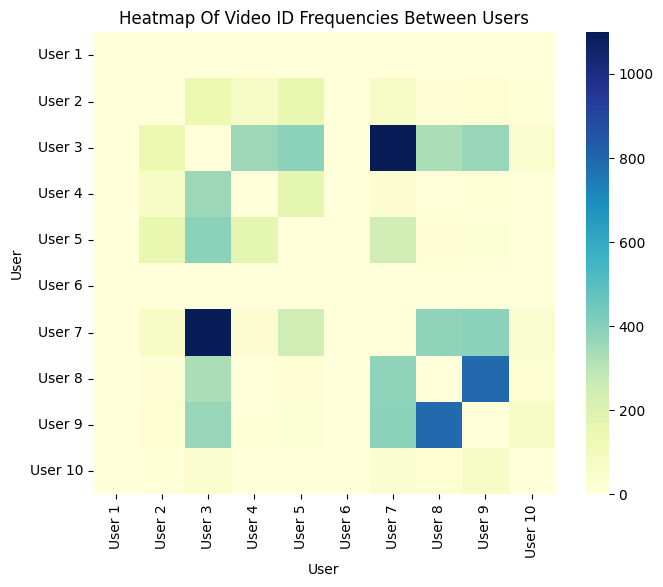

In [61]:
# Extract unique user IDs
users = set()
for pair in overlapDict.keys():
    users.update(pair)

# Create an empty matrix to store overlap counts
matrix_size = max(users) + 1
overlap_matrix = np.zeros((matrix_size, matrix_size))

# Fill the matrix with overlap counts
for pair, count in overlapDict.items():
    user1, user2 = pair
    overlap_matrix[user1, user2] = count
    overlap_matrix[user2, user1] = count 

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(overlap_matrix, cmap='YlGnBu', fmt='g', square=True, #annot=True displays the counts in the cells
            xticklabels=[f"User {i+1}" for i in range(matrix_size)], #cmap = viridis
            yticklabels=[f"User {i+1}" for i in range(matrix_size)])
plt.title('Heatmap Of Video ID Frequencies Between Users')
plt.xlabel('User')
plt.ylabel('User')
plt.show()

In [ ]:
#user2 = user.groupby('video_id').agg('count').reset_index()
#user2.columns = ['video_id','count' ]
#user2

In [ ]:
#dictCount = Counter(list5)
#len(dictCount)

## 4. Generate JSON files

In [ ]:
# Combine video descriptions and suggested words into one flat list
sentences = sum(user[['video_description', 'suggested_words']].values.tolist(), [])
len(sentences)

In [ ]:
#save to file
with open('user1.json', 'w') as fout:
    json.dump(sentences, fout)